In [1]:
using GeometricIntegrators
using GeometricIntegrators.Integrators.VPRK

In [2]:
set_config(:nls_stol_break, Inf);

In [3]:
using Plots
using GeometricProblems.PlotRecipes

In [4]:
#plotlyjs()
gr()

Plots.GRBackend()

#### Load example problem: guiding centre particle in ITER-like Solov'ev equilibrium

In [5]:
using ChargedParticleDynamics.GuidingCenter4d.GuidingCenter4dSolovevIterXpoint
using ChargedParticleDynamics.GuidingCenter4d.GuidingCenter4dSolovevIterXpoint: equ

┌ Info: Precompiling ChargedParticleDynamics [209b3593-7183-5600-9f8f-df5ce7fddd64]
└ @ Base loading.jl:1260
┌ Info: Skipping precompilation since __precompile__(false). Importing ChargedParticleDynamics [209b3593-7183-5600-9f8f-df5ce7fddd64].
└ @ Base loading.jl:1033


#### Get initial conditions and parameters

In [6]:
q0, params = initial_conditions_trapped()
#q0, params = initial_conditions_barely_passing()
#q0, params = initial_conditions_barely_trapped()
#q0, params = initial_conditions_deeply_passing()
#q0, params = initial_conditions_deeply_trapped()

([1.129032258064516, 0.0, 0.0, -0.002], (μ = 1.88e-7,))

#### Set time step and number of steps to integrate

In [7]:
nt  = 10000;
Δt  = 10000.;

## Reference Integrator

#### Construct reference tableau, ode, solution and integrator

In [8]:
ref = getTableauGLRK(1)
ode = guiding_center_4d_ode(q0, params)
sol = Solution(ode, Δt, nt)
int = Integrator(ode, ref, Δt)
;

#### Integrate with standard Gauss-Legendre Runge-Kutta method

In [9]:
integrate!(int, sol)

#### Plot reference solution (projection on poloidal plane)

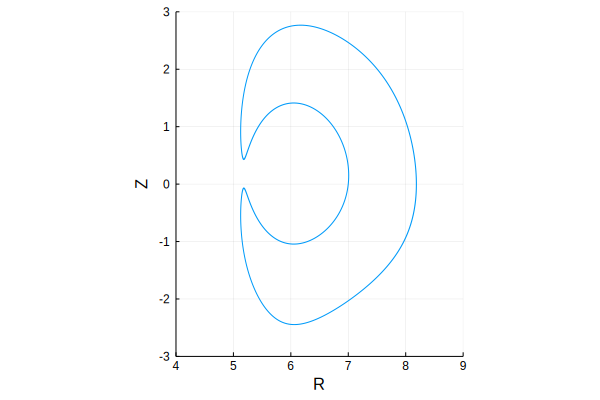

In [10]:
plot(sol.q[1,:].*equ.R₀, sol.q[2,:].*equ.R₀, xlabel="R", ylabel="Z", xlim=(4,9), ylim=(-3,+3), aspect_ratio=:equal, legend=:none)

#### Plot energy error of reference solution

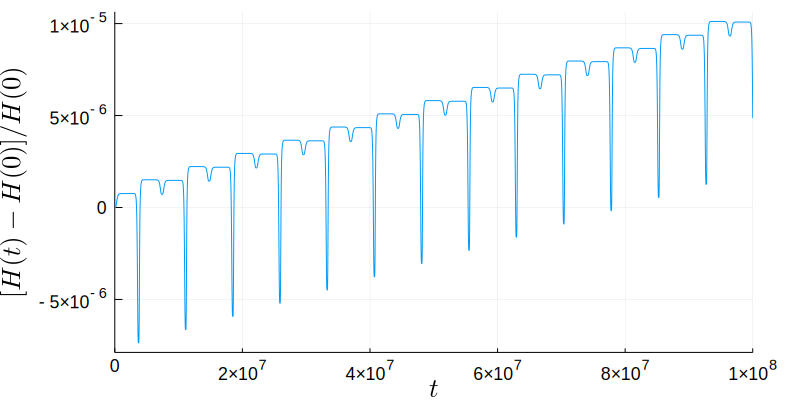

In [11]:
plotenergyerror(sol, energy = (t,q) -> hamiltonian(t,q,params))

## Variational Integrator

In [12]:
set_config(:nls_atol, 1E-15)
set_config(:nls_rtol, 1E-14)
set_config(:nls_nmax, 20);

#### Construct splitting tableau, sode, solution and integrator

In [13]:
vtab = getTableauVPGLRK(1)
iode = guiding_center_4d_iode(q0, params)
vsol = Solution(iode, Δt, nt)
vint = IntegratorVPRKpSymmetric(iode, vtab, Δt)
;

#### Integrate with splitting method

In [14]:
integrate!(vint, vsol)

#### Plot splitting solution (projection on poloidal plane)

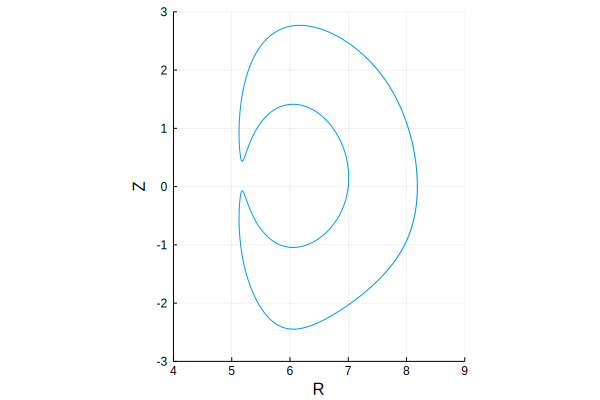

In [15]:
plot(vsol.q[1,:].*equ.R₀, vsol.q[2,:].*equ.R₀, xlabel="R", ylabel="Z", xlim=(4,9), ylim=(-3,+3), aspect_ratio=:equal, legend=:none)

#### Plot energy error of splitting solution

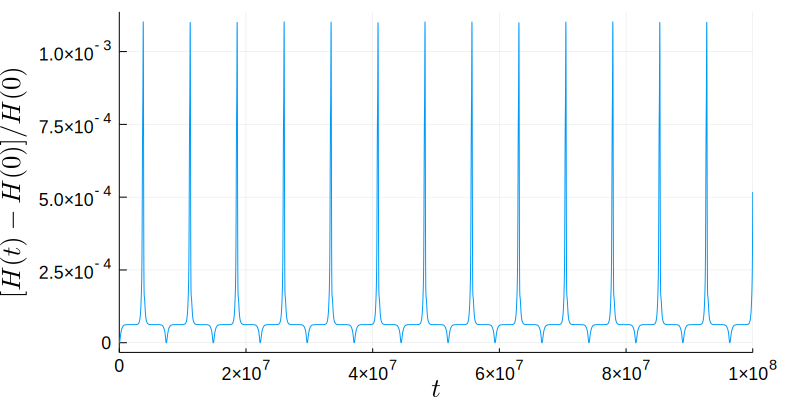

In [16]:
plotenergyerror(vsol, energy = (t,q) -> hamiltonian(t,q,params))